# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 34-> Deep Learning with TensorFlow/Keras</p>

# What is Deep Learning?
Deep Learning is a specialized branch of machine learning that uses algorithms known as neural networks to model high-level abstractions in data. These neural networks are composed of multiple layers (hence the term "deep"), allowing them to learn and represent data with intricate structures, such as images, speech, and text.
## Key Concepts
- Neural Networks: Inspired by the human brain, these are the foundational structures in deep learning, consisting of interconnected layers of nodes (neurons).

- Layers:

    - Input Layer: Receives the input data.
     - Hidden Layers: Multiple layers between input and output, where the network learns to identify features and patterns.
    - Output Layer: Produces the final prediction or classification.
- Activation Functions: Mathematical functions that determine the output of a neuron. Popular choices include ReLU (Rectified Linear Unit), Sigmoid, and Tanh.

- Backpropagation: A process used to optimize the neural network by adjusting weights in the network based on the error rate of the output.

- Training: The process of feeding data into the network and adjusting the weights to minimize the error in predictions.

## Popular Deep Learning Frameworks
- TensorFlow: An open-source library developed by Google for numerical computation and deep learning.
- PyTorch: A library developed by Facebook's AI Research lab, known for its flexibility and ease of use.
- Keras: A high-level neural networks API that runs on top of TensorFlow, simplifying the development of deep learning models.

## <span style='color:#ff6200'> Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

## <span style='color:#ff6200'> Generating Synthetic Dataset</span>

In [2]:
np.random.seed(42)
X = np.random.rand(500, 2)

true_weights = np.array([[3], [5]])
y = np.dot(X, true_weights) + 4  
y += np.random.randn(500, 1) * 0.5 


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((400, 2), (100, 2), (400, 1), (100, 1))

# What is TensorFlow?
TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem for developing, training, and deploying machine learning models, particularly deep learning models.

## Key Features of TensorFlow:
- Scalability: TensorFlow can be used for a wide range of tasks, from small-scale models on mobile devices to large-scale - distributed training on massive datasets.
- TensorFlow Hub: A library for reusable machine learning modules, enabling users to leverage pre-trained models and components.
- TensorFlow Lite: A lightweight version designed for mobile and embedded devices, allowing for on-device machine learning.
- TensorFlow Extended (TFX): An end-to-end platform for deploying production ML pipelines.
- Visualization with TensorBoard: A suite of visualization tools to understand, debug, and optimize machine learning models.
## Key Components:
- Tensors: The core data structure in TensorFlow, representing multi-dimensional arrays.
- Graphs: TensorFlow models are represented as computational graphs, where nodes correspond to mathematical operations, and edges represent the data (tensors) flowing between operations.
- Sessions: A session executes the operations defined in the computational graph.

# What is Keras?
Keras is a high-level neural networks API that runs on top of TensorFlow. It is designed to be user-friendly, modular, and easy to extend, making it ideal for both beginners and advanced users.

## Key Features of Keras:
- Simplicity and Ease of Use: Keras provides a clean and simple API, allowing for quick prototyping and easy model building.
- Modularity: Models in Keras are built by connecting configurable building blocks, making it highly flexible.
- Compatibility: Although it originally supported multiple backends (TensorFlow, Theano, and CNTK), Keras is now tightly integrated with TensorFlow.
- Pre-trained Models: Keras includes a suite of pre-trained models, which can be used for transfer learning or fine-tuning on new tasks.
- Support for Multiple Layers: Including dense, convolutional, recurrent, and others, which can be easily combined to create complex neural network architectures.

# <b><span style='color:#ff6200'> Neural Network</span>

In [10]:
model = models.Sequential()
model.add(layers.Dense(5, input_dim=2, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=0)

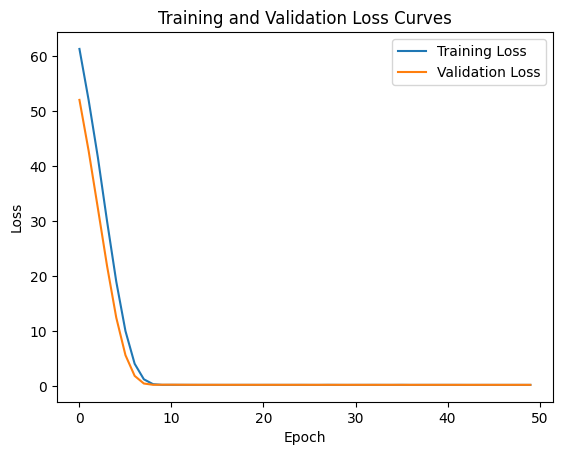

In [7]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [8]:
predictions = model.predict(X_val)

mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_val, predictions).numpy()
print(f"Mean Squared Error on Test Set: {mse_value}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error on Test Set: 0.27389106154441833


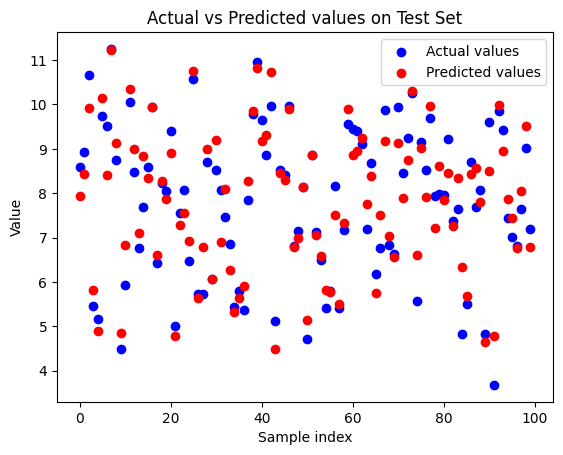

In [9]:
plt.scatter(range(len(y_val)), y_val, color='blue', label='Actual values')
plt.scatter(range(len(y_val)), predictions, color='red', label='Predicted values')
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values on Test Set')
plt.legend()
plt.show()